In [596]:
import numpy as np
import matplotlib.pyplot as plt

In [597]:
data_dir = "../simulations/"

In [598]:
sim = 'a-1.75'
#r_list = ['0.0', '0.1', '1.0', '10.0', '100.0']
r_list = np.logspace(-1,2,10)
n_r = len(r_list)
n_samples = 100
x = np.arange(1, n_samples) / n_samples

In [599]:
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
    with open(data_dir + fn) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] = np.array(line.split(), dtype=float)
                jMAF_triu[i,:] = np.array(datafile.readline().split())
                break

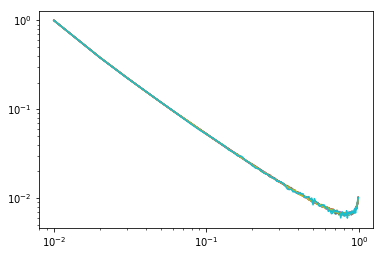

In [600]:
for i in range(n_r):
    plt.loglog(x, mMAF[i,:]/mMAF[i,0])
plt.show()

In [601]:
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

In [602]:
mMAF_sq = mMAF[:,:,None] * mMAF[:,None,:]
ratio = jMAF / mMAF_sq

0.1


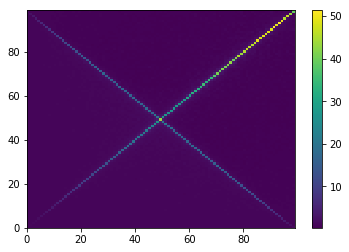

0.215443469003


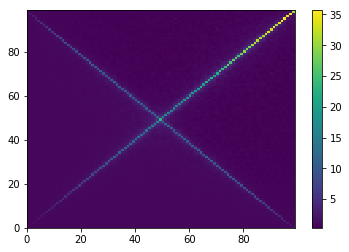

0.464158883361


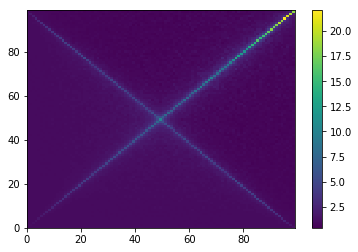

1.0


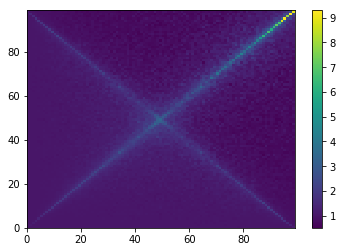

2.15443469003


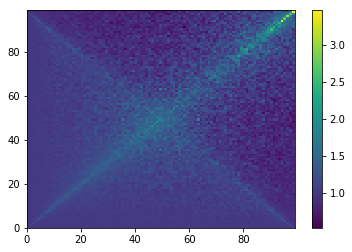

4.64158883361


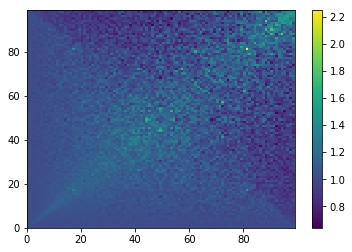

10.0


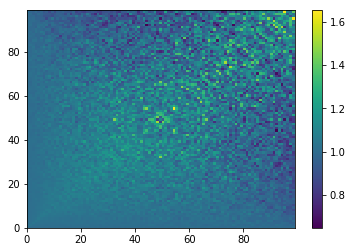

21.5443469003


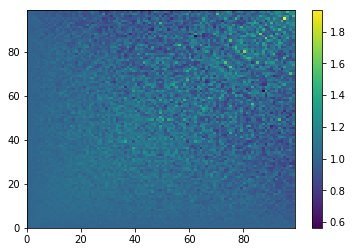

46.4158883361


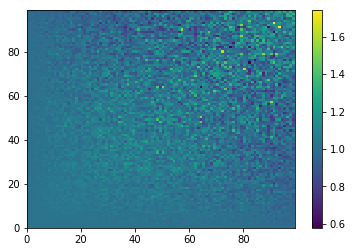

100.0


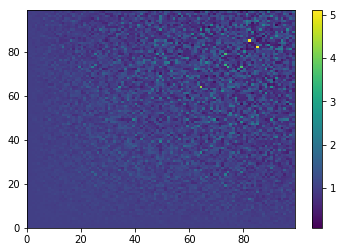

In [603]:
for i, r in enumerate(r_list):
    print(r)
    plt.pcolor(ratio[i,:,:])
    plt.colorbar()
    plt.show()

0.1


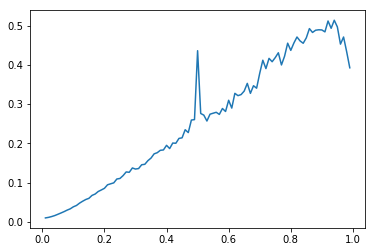

0.215443469003


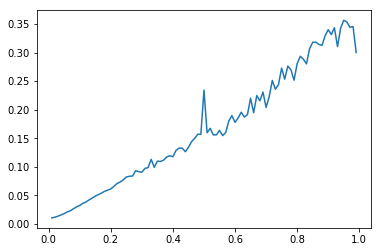

0.464158883361


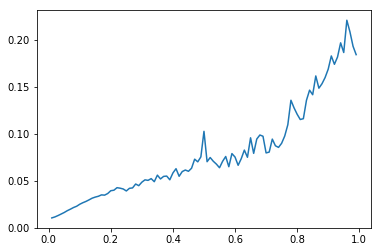

1.0


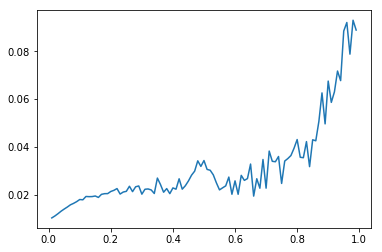

2.15443469003


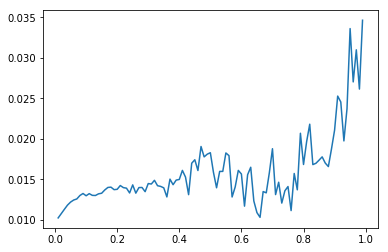

4.64158883361


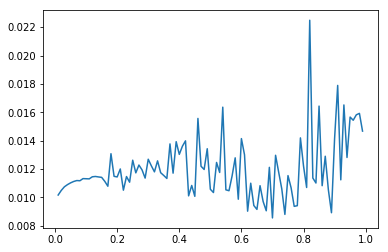

10.0


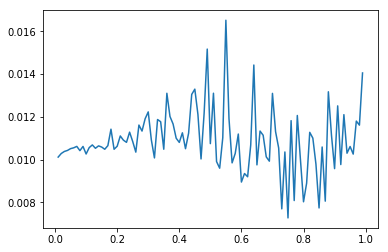

21.5443469003


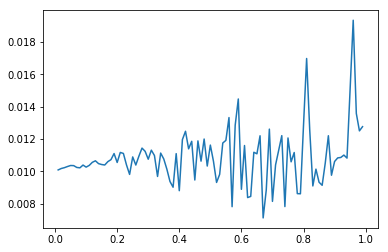

46.4158883361


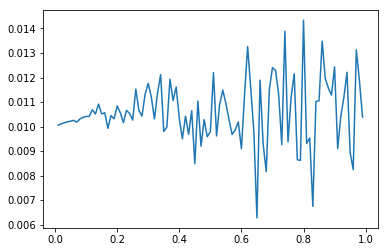

100.0


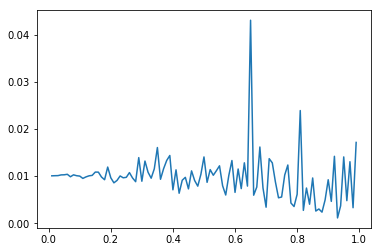

In [604]:
for i, r in enumerate(r_list):
    print(r)
    plt.plot(x, np.diagonal(ratio[i,:,:])/n_samples)
    #plt.plot(x, x,'--k')
    #plt.plot(x, x**(4/3),':k')
    plt.show()

0.1


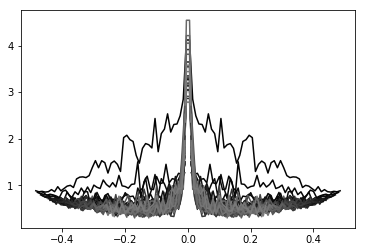

0.215443469003


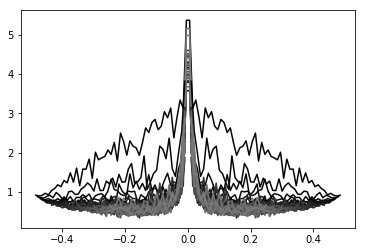

0.464158883361


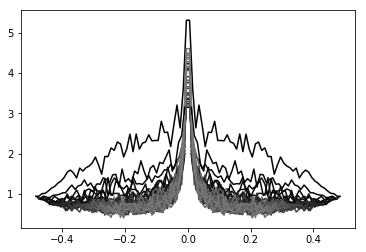

1.0


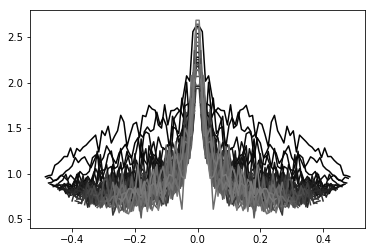

2.15443469003


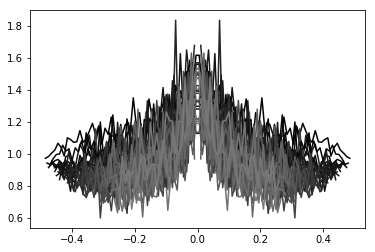

4.64158883361


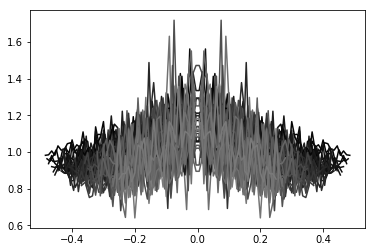

10.0


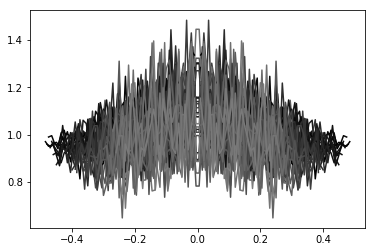

21.5443469003


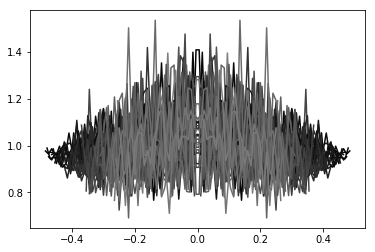

46.4158883361


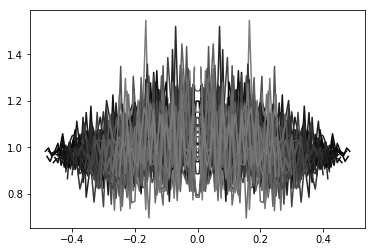

100.0


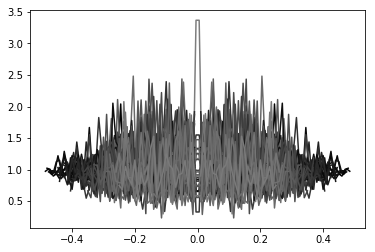

In [605]:
ratio_flipped = ratio[:,:,::-1]
for j, r in enumerate(r_list):
    print(r)
    
    for i in range(1,50,2):
        c = str(.5 - (n_samples/2 - i)/n_samples)
        plt.plot(x[:-i] - 1/2 + i/(2*n_samples),
                 np.diagonal(ratio_flipped[j,:,:], offset=-i),
                 '-', color=c)
    
    for i in range(2,50,2):
        c = str(.5 - (n_samples/2 - i)/n_samples)
        y = np.copy(np.diagonal(ratio_flipped[j,:,:], offset=-i))
        y[len(y)//2] = np.nan
        plt.plot(x[:-i] - 1/2 + i/(2*n_samples),
                 y,
                 '-', color=c)
    plt.show()

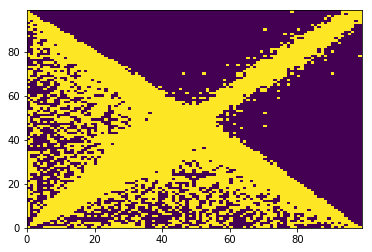

In [606]:
plt.pcolor(ratio[1,:,:]>1)
plt.show()

In [607]:
x_fold = x[:n_samples//2]
mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 3

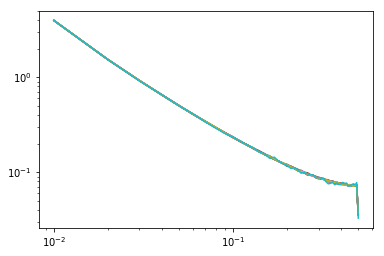

In [608]:
plt.loglog(x_fold, mMAF_fold.T)
plt.show()

In [609]:
mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

0.1


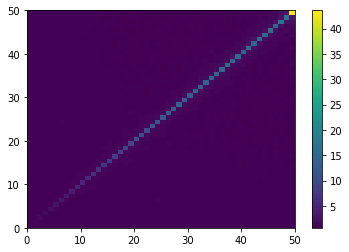

0.215443469003


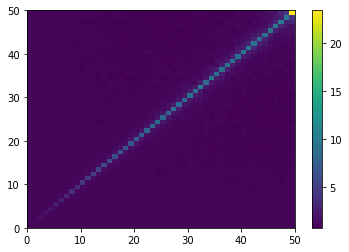

0.464158883361


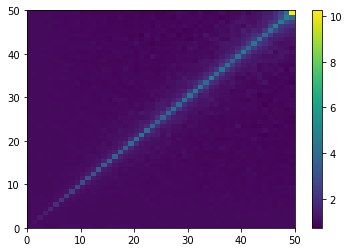

1.0


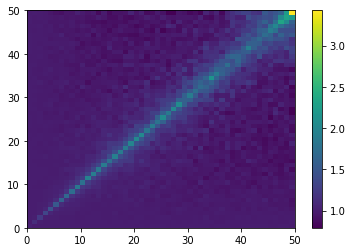

2.15443469003


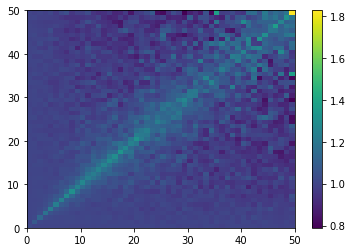

4.64158883361


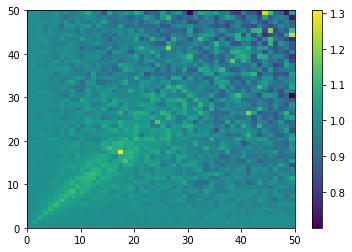

10.0


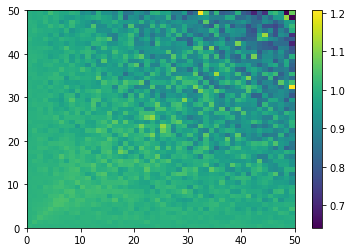

21.5443469003


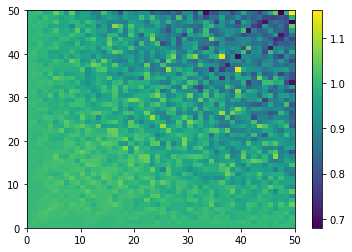

46.4158883361


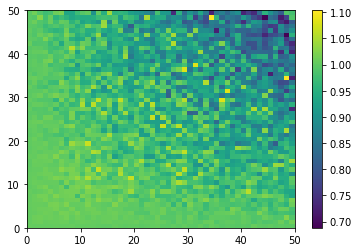

100.0


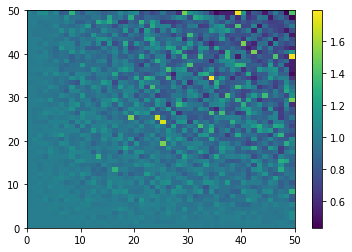

In [610]:
for i, r in enumerate(r_list):
    print(r)
    plt.pcolor(ratio_fold[i,:,:])
    plt.colorbar()
    plt.show()

0.1


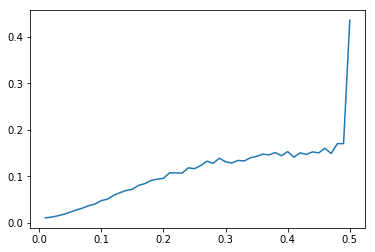

0.215443469003


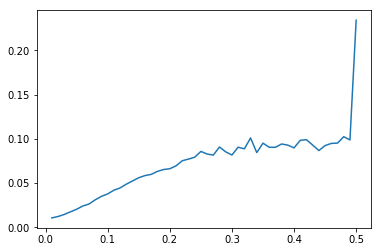

0.464158883361


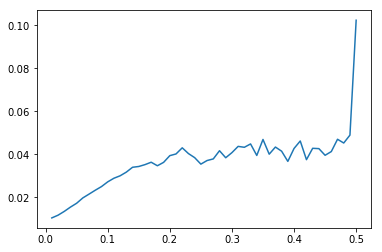

1.0


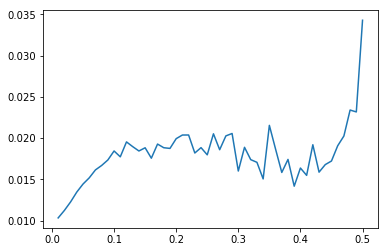

2.15443469003


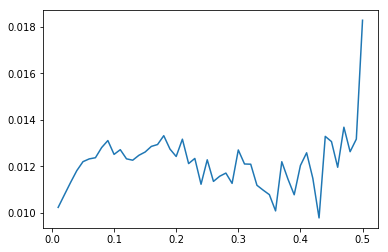

4.64158883361


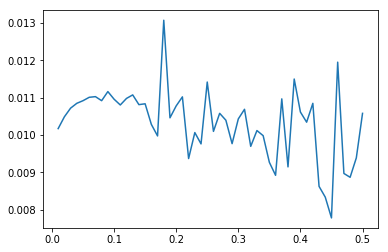

10.0


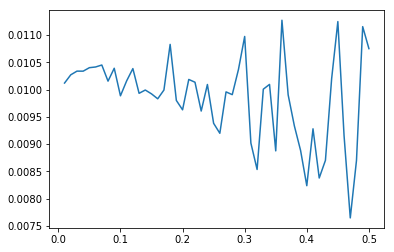

21.5443469003


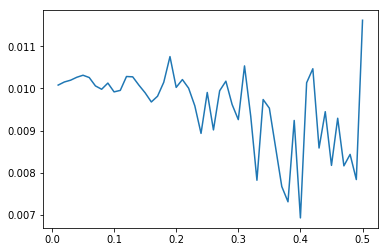

46.4158883361


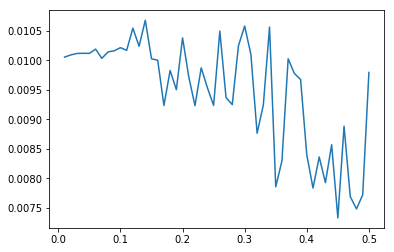

100.0


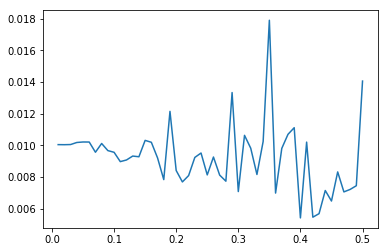

In [611]:
for i, r in enumerate(r_list):
    print(r)
    plt.plot(x_fold, np.diagonal(ratio_fold[i,:,:])/n_samples)
    #plt.plot(x, x,'--k')
    #plt.plot(x, x**(4/3),':k')
    plt.show()

0.1


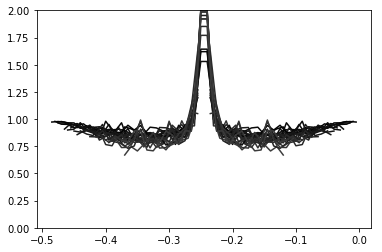

0.215443469003


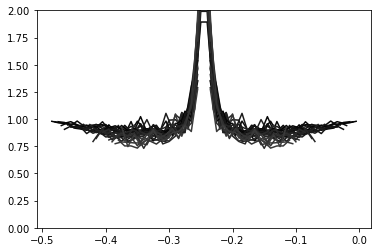

0.464158883361


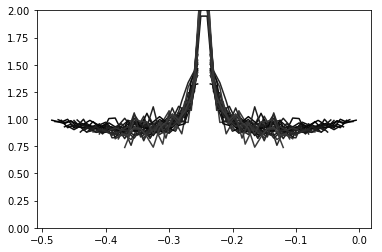

1.0


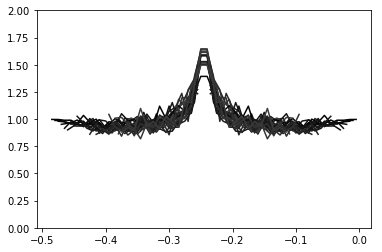

2.15443469003


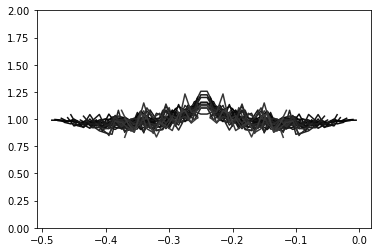

4.64158883361


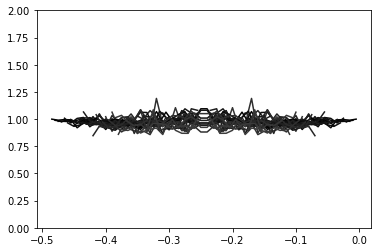

10.0


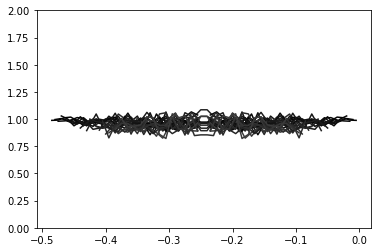

21.5443469003


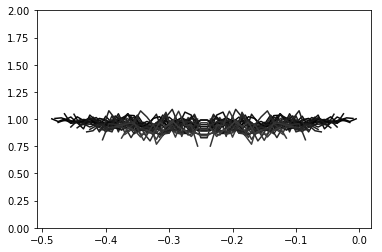

46.4158883361


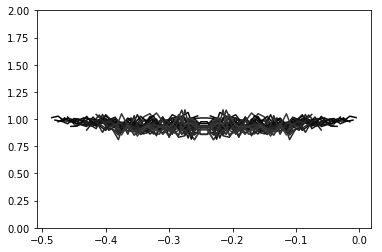

100.0


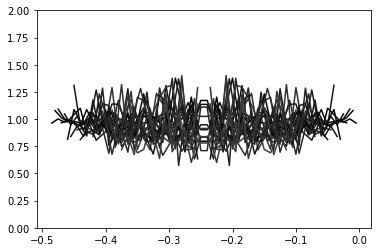

In [612]:
ratio_flipped = ratio_fold[:,:,::-1]
for j, r in enumerate(r_list):
    print(r)
    
    for i in range(2,25,2):
        c = str(.5 - (n_samples/2 - i)/n_samples)
        plt.plot(x_fold[:-i] - 1/2 + i/(2*n_samples),
                 np.diagonal(ratio_flipped[j,:,:], offset=-i),
                 '-', color=c)
    
    for i in range(1,25,2):
        c = str(.5 - (n_samples/2 - i)/n_samples)
        y = np.copy(np.diagonal(ratio_flipped[j,:,:], offset=-i))
        y[len(y)//2] = np.nan
        plt.plot(x_fold[:-i] - 1/2 + i/(2*n_samples),
                 y,
                 '-', color=c)
    plt.ylim([0,2])
    plt.show()

0.1


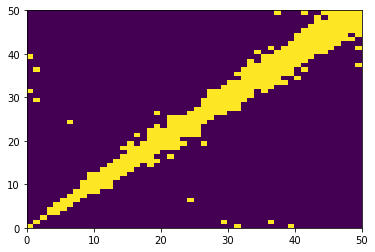

0.215443469003


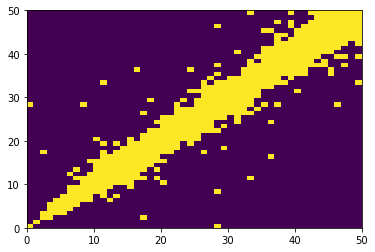

0.464158883361


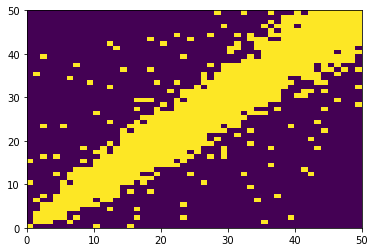

1.0


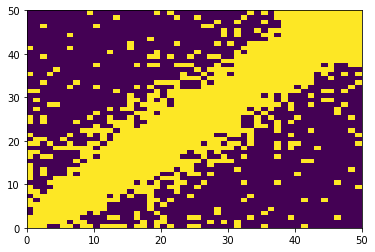

2.15443469003


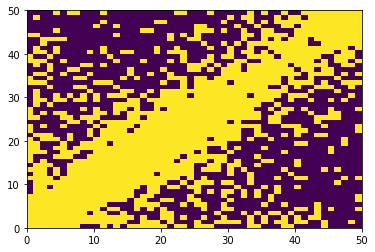

4.64158883361


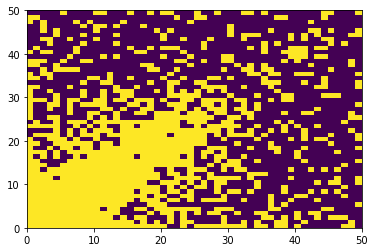

10.0


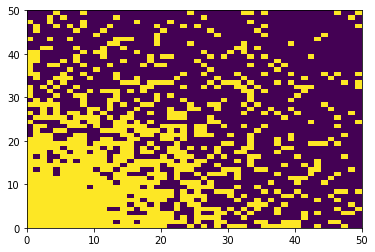

21.5443469003


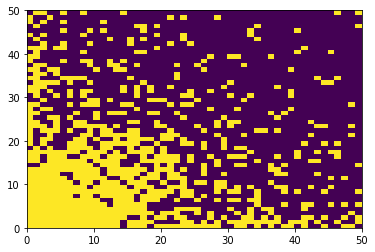

46.4158883361


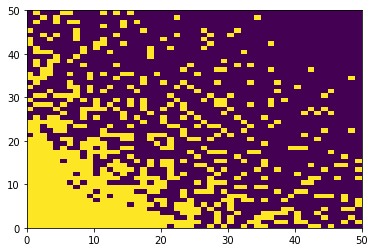

100.0


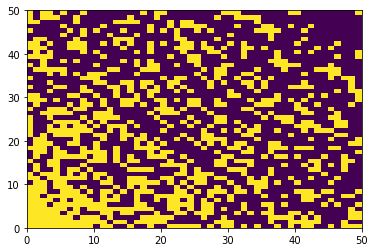

In [613]:
for i,r in enumerate(r_list):
    print(r)
    plt.pcolor(ratio_fold[i,:,:]>1)
    plt.show()

# Coarse-graining

In [614]:
test = np.arange(32).reshape(2,-1)
print(test)
res = 3
pad = res - (test.shape[1] % res)
padded = np.pad(test, ((0,0),(0,pad)), 'constant')
print(padded)
print(padded.shape)
block_sum = padded.reshape(-1, padded.shape[1]//res, res).sum(axis=2)
print(block_sum)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]]
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15  0  0]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31  0  0]]
(2, 18)
[[ 3 12 21 30 39 15]
 [51 60 69 78 87 31]]


## Simulations

In [615]:
res = 10
pad = (res - (mMAF_fold.shape[1] % res)) % res

m_padded = np.pad(mMAF_fold, ((0,0),(0,pad)), 'constant')
mMAF_coarse = m_padded.reshape(-1, m_padded.shape[1]//res, res).sum(axis=2)

j_padded = np.pad(jMAF_fold, ((0,0), (0,pad), (0,pad)), 'constant')
jMAF_coarse = j_padded.reshape(-1, j_padded.shape[1]//res, res, j_padded.shape[1]//res, res).sum(axis=(2,4))

ratio_coarse = jMAF_coarse / (mMAF_coarse[:,None,:]*mMAF_coarse[:,:,None])

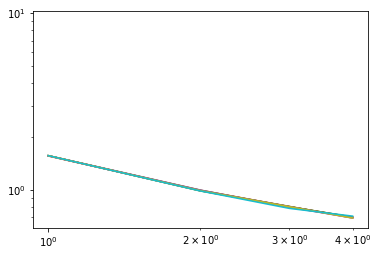

In [616]:
plt.loglog(mMAF_coarse.T)
plt.show()

[ 0.94457921  2.22134893  3.39099466  3.213122    2.30700981  1.25739608
  0.40853541 -0.1080529  -0.38980819 -0.86137994]
[ 1.98606596  2.92931244  3.72147343  3.33022161  2.35213494  1.28413317
  0.43057503 -0.08481605 -0.36830356 -0.66088936]
[ 3.12489316  3.67549508  4.06473936  3.43564724  2.37995854  1.29525247
  0.43677413 -0.07861637 -0.36180124 -0.61244608]
[ 4.38773479  4.49468665  4.44350117  3.5549572   2.40737475  1.30297787
  0.44060104 -0.0762337  -0.35966883 -0.59481678]


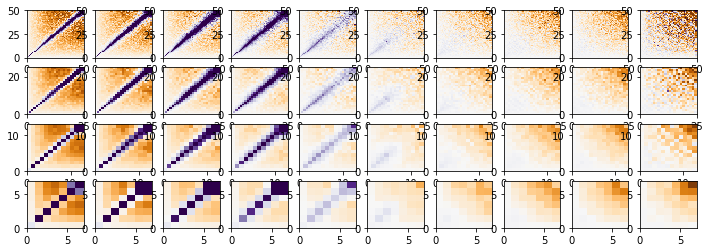

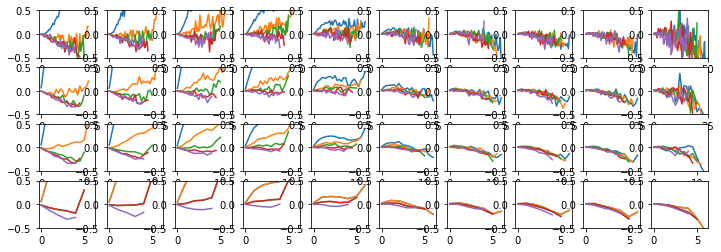

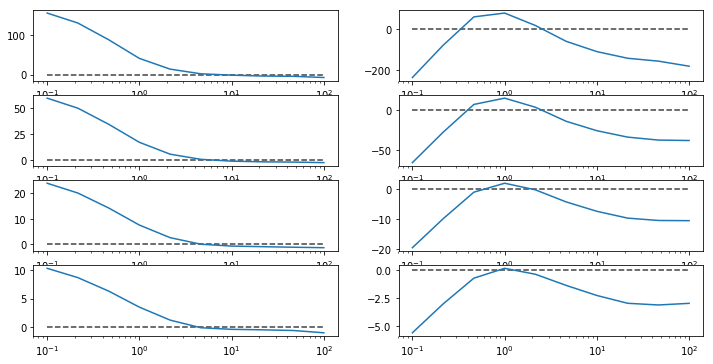

In [617]:
fig1 = plt.figure(figsize=(12,4))
fig2 = plt.figure(figsize=(12,4))
fig3 = plt.figure(figsize=(12,6))

res_list = [1,2,4,8]
for i_res, res in enumerate(res_list):
    pad = (res - (mMAF_fold.shape[1] % res)) % res

    m_padded = np.pad(mMAF_fold, ((0,0),(0,pad)), 'constant')
    mMAF_coarse = m_padded.reshape(-1, m_padded.shape[1]//res, res).sum(axis=2)

    j_padded = np.pad(jMAF_fold, ((0,0), (0,pad), (0,pad)), 'constant')
    jMAF_coarse = j_padded.reshape(-1, j_padded.shape[1]//res, res, j_padded.shape[1]//res, res).sum(axis=(2,4))

    ratio_coarse = jMAF_coarse / (mMAF_coarse[:,None,:]*mMAF_coarse[:,:,None])
    print(np.sum(mMAF_coarse[:,None,:]*mMAF_coarse[:,:,None]*np.log2(ratio_coarse), axis=(1,2)))

    for i_r, r in enumerate(r_list):
        #print(r)
        ax = fig1.add_subplot(len(res_list), n_r, i_res*n_r + i_r + 1)
        ax.pcolormesh(np.log2(ratio_coarse[i_r,:,:]), vmin=-.5, vmax=.5, cmap='PuOr')
        
        ax = fig2.add_subplot(len(res_list), n_r, i_res*n_r + i_r + 1)
        for o in range(1,20,4):
            ax.plot(np.log2(np.diagonal(ratio_coarse[i_r,:,:], offset=o//res)))
        ax.set_ylim([-.5,.5])
    
    ax = fig3.add_subplot(len(res_list), 2, 2*i_res+1)
    diag = np.sum(np.diagonal(np.log2(ratio_coarse), axis1=1, axis2=2), axis=1)
    ax.semilogx(r_list, diag)
    ax.hlines(0,r_list[0],r_list[-1], linestyle='dashed', color='.25')
    ax = fig3.add_subplot(len(res_list), 2, 2*i_res+2)
    ax.semilogx(r_list, np.sum(np.log2(ratio_coarse), axis=(1,2))-diag)
    ax.hlines(0,r_list[0],r_list[-1], linestyle='dashed', color='.25')

plt.show()

[ 1.          0.69281435  0.41718473  0.23444453  0.13368294  0.07075716
  0.02677759  0.00189973 -0.0119003  -0.01231636]
[  1.00000000e+00   7.23613584e-01   4.64808690e-01   2.71482336e-01
   1.56869083e-01   8.29475707e-02   3.07213291e-02   9.50780582e-04
  -1.54379780e-02  -2.63274779e-02]
[  1.00000000e+00   7.57517243e-01   5.18263237e-01   3.15843227e-01
   1.85648324e-01   9.84745257e-02   3.63365320e-02   7.12591306e-04
  -1.89220048e-02  -3.48137609e-02]
[  1.00000000e+00   7.93401772e-01   5.78304180e-01   3.68395454e-01
   2.21080474e-01   1.17922055e-01   4.34393141e-02   6.59891889e-04
  -2.29657474e-02  -4.33785332e-02]


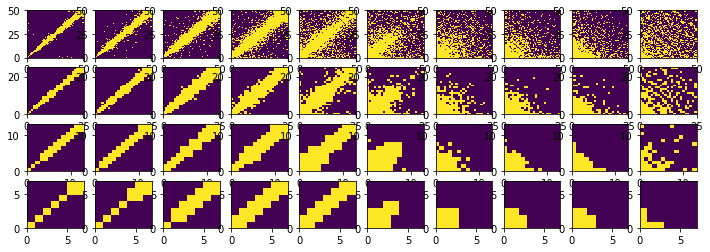

In [618]:
fig = plt.figure(figsize=(12,4))
res_list = [1,2,4,8]
for i_res, res in enumerate(res_list):
    pad = (res - (mMAF_fold.shape[1] % res)) % res

    m_padded = np.pad(mMAF_fold, ((0,0),(0,pad)), 'constant')
    mMAF_coarse = m_padded.reshape(-1, m_padded.shape[1]//res, res).sum(axis=2)

    j_padded = np.pad(jMAF_fold, ((0,0), (0,pad), (0,pad)), 'constant')
    jMAF_coarse = j_padded.reshape(-1, j_padded.shape[1]//res, res, j_padded.shape[1]//res, res).sum(axis=(2,4))

    ratio_coarse = jMAF_coarse / (mMAF_coarse[:,None,:]*mMAF_coarse[:,:,None])
    MI = np.sum(jMAF_coarse*np.log2(ratio_coarse), axis=(1,2))
    print(MI/MI[0])
    for i_r, r in enumerate(r_list):
        #print(r)
        ax = fig.add_subplot(len(res_list), n_r, i_res*n_r + i_r + 1)
        ax.pcolormesh(np.log2(ratio_coarse[i_r,:,:])>0)
plt.show()